In [54]:
# import  libraries
import pandas as pd # for working with dataframes
import numpy as np # for working with arrays and creating some visualisations and calculations
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # for some visualisations

In [55]:
# download the data set 
# 'names = []' will set the atributes for the datafrane
# Ref.[2] 
data = pd.read_csv("/Users/katelisovenko/Yandex.Disk.localized/kate/springboard/pands_project/iris/iris.data", names=['sep_length', 'sep_width', 'pet_length','pet_width','class'])
data.sample(10)# to have a look at the data sample

,sep_length,sep_width,pet_length,pet_width,class
71,6.1,2.8,4.0,1.3,Iris-versicolor
78,6.0,2.9,4.5,1.5,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
15,5.7,4.4,1.5,0.4,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-setosa
125,7.2,3.2,6.0,1.8,Iris-virginica
50,7.0,3.2,4.7,1.4,Iris-versicolor


In [56]:
# getting statistical info
data.describe()

,sep_length,sep_width,pet_length,pet_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [57]:
# getting general info about dataframe
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sep_length  150 non-null    float64
 1   sep_width   150 non-null    float64
 2   pet_length  150 non-null    float64
 3   pet_width   150 non-null    float64
 4   class       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
# To get the lines with dublicates if there is ones:
# Ref.[3]
duplicated = data[data.duplicated()]
duplicated

,sep_length,sep_width,pet_length,pet_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


## Dataset overview:

The dataset contains 150 entries, 3 of them are duplicated, none missed. 

Columns "sep_length", "sep_width",	"pet_length", "pet_width", contain float type data, the "class" column- object type.

Statistical info reflects the general information about all the classes together. That means, for instance, that the mean sepal length was calculated without specifying the class of Iris. Nevertheless, I will provide some description:

* The mean **sepal length** is 5.84 mm, median  is 5.8 mm., std = 0.82 
The distribution of the sepal length is approximately symmetrical. The data has a low level of variation around the mean.

* The mean **sepal width** is 3.05 mm, median  is 3.00 mm., std = 0.42
The distribution of the sepal length is approximately symmetrical. The data has a low level of variation around the mean.

* The mean **petal length** is 3.76 mm, median  is 4.35 mm., std = 1.76
The distribution might not be symmetrical.  The data has spread significantly around the mean.

* The mean **petal width** is 1.20 mm, median  is 1.30 mm., std = 0.76
The distribution of the sepal length is approximately symmetrical. The data has a low level of variation around the mean.


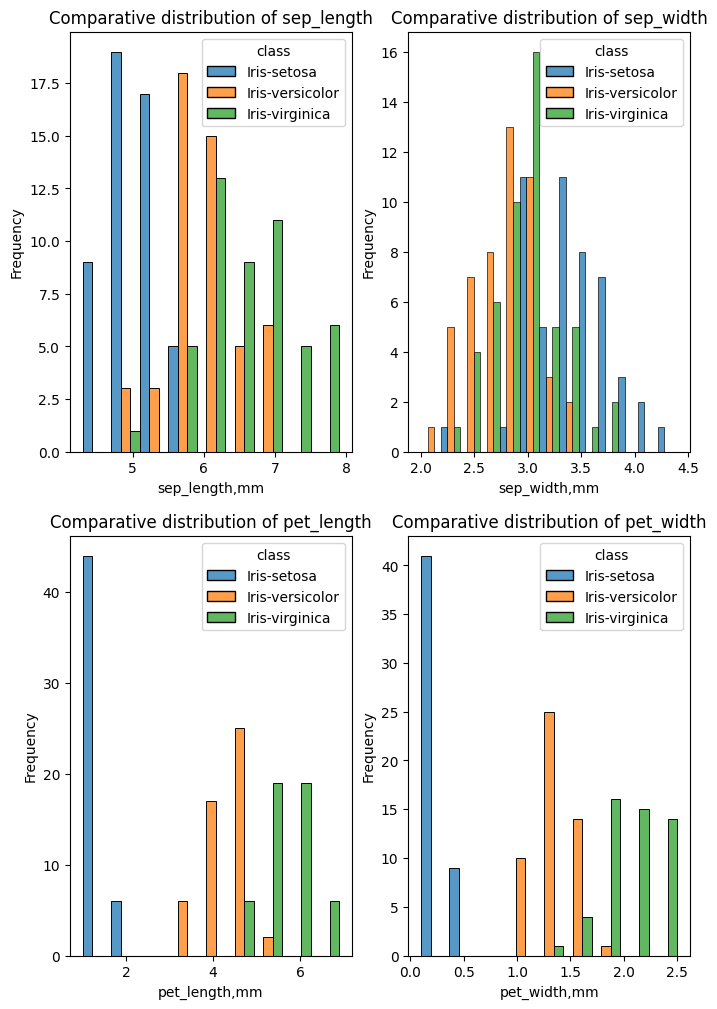

In [68]:
# I am creating histogram in the Seaborn, as I believe it is
# the easy way to use additional parameters such as "hue" and "multiple" to get the clear visualisation.
# Ref.[4][5]

# This program takes a column and creates a distribution histogram for it's data.
# 'column' is a columns's name in dataframe.
# 'hue' is an additional parameter for data categorization, in my case it is the class of flowers. 

def plot_hist_hue(data, column, hue):  
    sns.histplot(data=data, x= data[column], hue = hue , multiple = 'dodge')
    plt.title(f'Comparative distribution of {column}')
    plt.xlabel(f'{column},mm')
    plt.ylabel('Frequency')

fig, ax = plt.subplots(2, 2, figsize=(8, 12))  # creating a figure and a grid of subplots with 2 rows and 2 columns

plt.subplot(2,2,1) # first hist
plot_hist_hue(data=data, column = 'sep_length', hue = 'class')

plt.subplot(2,2,2) # second hist
plot_hist_hue(data=data, column = 'sep_width', hue = 'class')

plt.subplot(2,2,3) # third hist
plot_hist_hue(data=data, column = 'pet_length', hue = 'class')

plt.subplot(2,2,4) # fourth hist
plot_hist_hue(data=data, column = 'pet_width', hue = 'class')

plt.show()
plt.close()


<Figure size 800x800 with 0 Axes>

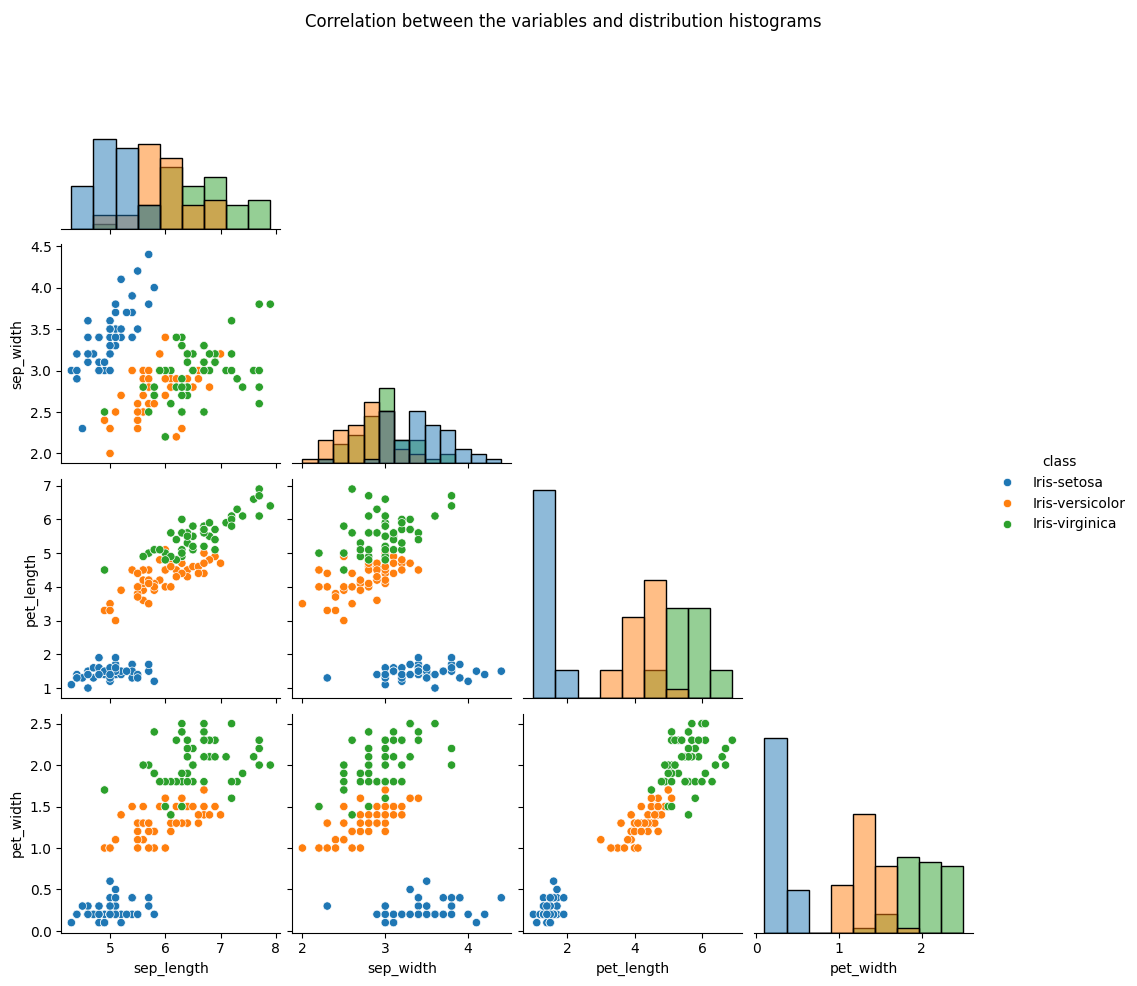

In [106]:

plt.figure(figsize=(8,8,))
sns.pairplot(data, hue='class',diag_kind="hist",  corner=True)
plt.suptitle('Correlation between the variables and distribution histograms')
plt.show()
